In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
!pip install Pillow
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.test_model_cesm, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/*.nc
Files for CESM1-1-CAM5-CMIP5: ['/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r21i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r23i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r33i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r11i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/nor

In [5]:
# load the obs dataset manually
obs_manual = xr.open_dataset("/home/users/benhutch/ERA5_psl/long-ERA5-full-north-atlantic.nc", chunks={"time": 50})

In [6]:
obs_manual

<xarray.Dataset>
Dimensions:  (time: 252, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables:
    var151   (time, lat, lon) float32 dask.array<chunksize=(50, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 24 13:57:07 2023: cdo -f nc copy /home/users/benhut...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

(252, 721, 1440)
lons: <xarray.DataArray 'lon' (lon: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02])
Coordinates:
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X
lats: <xarray.DataArray 'lat' (lat: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ])
Coordinates:
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y


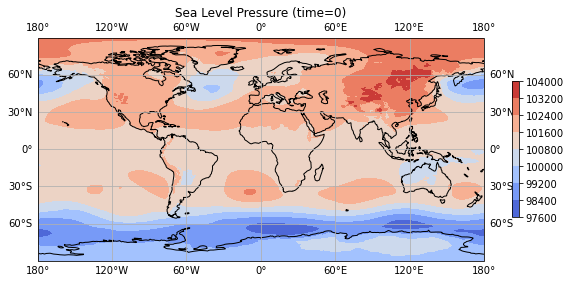

In [7]:
# Select the first time step
timestep = 0

# Extract the sea level pressure data for the first time step
slp = obs_manual['var151'].values

print(np.shape(slp))

# Set up the figure
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the sea level pressure data
c = ax.contourf(obs_manual['lon'], obs_manual['lat'], slp[0,:,:] , transform=ccrs.PlateCarree(), cmap='coolwarm')

lons = obs_manual['lon']
lats = obs_manual['lat']

print("lons:", lons)
print("lats:", lats)

# Add coastlines and gridlines to the plot
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add a colorbar to the plot
cbar = fig.colorbar(c, ax=ax, shrink=0.5)

# Set the title of the plot
ax.set_title(f"Sea Level Pressure (time={timestep})")

# Show the plot
plt.show()

In [8]:
obs_manual

<xarray.Dataset>
Dimensions:  (time: 252, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables:
    var151   (time, lat, lon) float32 dask.array<chunksize=(50, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 24 13:57:07 2023: cdo -f nc copy /home/users/benhut...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [9]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>
Variable data values:  [[[-2.88593750e+01 -3.30859375e+01 -4.00859375e+01 ... -9.45781250e+01
   -8.23828125e+01 -7.88671875e+01]
  [-2.58593750e+01 -3.74453125e+01 -4.52734375e+01 ... -1.00015625e+02
   -9.10703125e+01 -8.00234375e+01]
  [-2.39921875e+01 -3.90312500e+01 -5.01328125e+01 ... -1.03421875e+02
   -9.68281250e+01 -8.45390625e+01]
  ...
  [ 6.10468750e+01  6.16250000e+01  6.44296875e+01 ...  6.35398438e+02
    6.55898438e+02  6.72859375e+02]
  [ 5.31406250e+01  5.13203125e+01  5.64453125e+01 ...  6.55171875e+02
    6.72960938e+02  6.87375000e+02]
  [ 3.92656250e+01  4.63828125e+01  3.88515625e+01 ...  6.41335938e+02
    6.57054688e+02  6.70742188e+02]]

 [[-4.85156250e+01 -4.62734375e+01 -4.83437500e+01 ... -2.26015625e+01
   -2.54062500e+01 -2.80703125e+01]
  [-5.58437500e+01 -6.12968750e+01 -6.19687500e+01 ... -3.26640625e+01
   -3.58203125e+01 -3.30078125e+01]
  [-7.62031250e+01 -7.89531250e+01 -7.86953125e+01 ... -4.23046875e+01
   -4.5109375

In [10]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl_na
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [11]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs, 
                               forecast_range, season, obs_path, obs_var_name)

Regridded observations dataset: Frozen({'time': 252, 'lat': 73, 'lon': 144})
Region grid dimensions: {'lon1': 100, 'lon2': 217.5, 'lat1': 77.5, 'lat2': 20}
Regridded observations dataset: Frozen({'time': 252, 'lat': 24, 'lon': 48})
Regridded observations dataset: <xarray.Dataset>
Dimensions:  (time: 252, lat: 24, lon: 48)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lon      (lon) float64 100.0 102.5 105.0 107.5 ... 210.0 212.5 215.0 217.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float32 dask.array<chunksize=(50, 24, 48), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 24 13:57:07 2023: cdo -f nc copy /home/users/benhut...
    CDO:          Climate Data Operators version 2.0.4 (h

/opt/jaspy/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Processed observations dataset obs anomalies: [[[ 1.17675000e+03  1.17085156e+03  1.17477344e+03 ...  1.99093750e+02
    1.75265625e+02  1.52656250e+02]
  [ 1.05100000e+03  1.04717188e+03  1.06985156e+03 ...  2.04773438e+02
    1.76898438e+02  1.44140625e+02]
  [ 9.13195312e+02  9.27765625e+02  9.40484375e+02 ...  2.16468750e+02
    1.83796875e+02  1.49140625e+02]
  ...
  [ 1.18203125e+02  1.28414062e+02  5.82890625e+01 ...  1.31242188e+02
    1.22484375e+02  1.14617188e+02]
  [ 1.58226562e+02  1.63375000e+02  1.37500000e+02 ...  1.34203125e+02
    1.26000000e+02  1.20945312e+02]
  [ 1.87882812e+02  1.53492188e+02  1.32835938e+02 ...  1.24171875e+02
    1.19000000e+02  1.12476562e+02]]

 [[-1.66187500e+02 -1.79960938e+02 -1.68539062e+02 ...  7.09156250e+02
    7.73953125e+02  8.35718750e+02]
  [-4.22812500e+02 -4.34640625e+02 -4.07335938e+02 ...  4.55585938e+02
    5.24960938e+02  5.96828125e+02]
  [-5.47867188e+02 -5.42796875e+02 -5.21953125e+02 ...  1.79156250e+02
    2.47484375e+02 

In [12]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 100.0 102.5 105.0 107.5 ... 210.0 212.5 215.0 217.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 48), meta=np.ndarray>

In [13]:
# # check the values of obs
obs["var151"]

# count how many value are NaN
nan_count = np.isnan(obs["var151"]).sum()

print(nan_count.values)

# count how many values are not NaN
not_nan_count = np.count_nonzero(obs["var151"])

print(not_nan_count)

# calculate the percentage of NaN values
nan_percentage = nan_count / (nan_count + not_nan_count) * 100

# print the percentage of NaN values
print("Percentage of NaN values in obs: ", nan_percentage)

8064
72575
Percentage of NaN values in obs:  <xarray.DataArray 'var151' ()>
dask.array<mul, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


In [14]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 100.0 102.5 105.0 107.5 ... 210.0 212.5 215.0 217.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 48), meta=np.ndarray>

Observations dimensions: Frozen({'time': 63, 'lon': 48, 'lat': 24})
Observations variables: <xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 100.0 102.5 105.0 107.5 ... 210.0 212.5 215.0 217.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 48), meta=np.ndarray>
Observations latitude values: [77.5 75.  72.5 70.  67.5 65.  62.5 60.  57.5 55.  52.5 50.  47.5 45.
 42.5 40.  37.5 35.  32.5 30.  27.5 25.  22.5 20. ]
Observations longitude values: [100.  102.5 105.  107.5 110.  112.5 115.  117.5 120.  122.5 125.  127.5
 130.  132.5 135.  137.5 140.  142.5 145.  147.5 150.  152.5 155.  157.5
 160.  162.5 165.  167.5 170.  172.5 175.  177.5 180.  182.5 185.  187.5
 190.  192.5 195.  197.5 200.  202.5 205.  207.5 210.  212.5 215.  217.5]
Observations variable: 

/opt/jaspy/lib/python3.10/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/jaspy/lib/python3.10/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


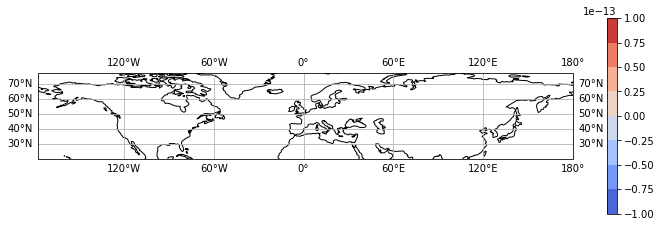

In [15]:
# # Attempt to plot the data
fnc.plot_obs_data(obs)

In [16]:
print(type(variable_data))

<class 'dict'>


extracting data for model: CESM1-1-CAM5-CMIP5
trying to print values for each member for debugging
values for model: CESM1-1-CAM5-CMIP5
values for members: <xarray.DataArray 'psl' (time: 58, lat: 24, lon: 48)>
dask.array<open_dataset-cfe951d2ea421739b74f10fd13c9ed82psl, shape=(58, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1965-07-31 00:00:00 ... 2022-07-31 00:00:00
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    comment:        PSL
    description:    not, in general, the same as surface pressure
    frequency:      mon
    id:             psl
    mipTable:       Amon
    out_name:       psl
    prov:     

/home/users/benhutch/skill-maps/python/functions.py:795: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})


model values [[ 0.06641015  0.06624804  0.06282617 ...  0.0672832   0.03443555
   0.03833008]
 [ 0.0793457   0.0772832   0.07424609 ...  0.08001562  0.0543418
   0.05390234]
 [ 0.0940918   0.0890625   0.08456836 ...  0.09302149  0.07410938
   0.06202929]
 ...
 [-0.09451563 -0.10532031 -0.087375   ...  0.16166797  0.24347071
   0.30261526]
 [-0.11145312 -0.06955859 -0.05245508 ...  0.23398438  0.2808418
   0.31567967]
 [-0.17091015 -0.13099024 -0.09261328 ...  0.17043945  0.20328319
   0.2323496 ]]
obs values [[-1.19330078 -1.19150391 -1.17498047 ... -0.30587891 -0.25736328
  -0.21720703]
 [-1.13025391 -1.09904297 -1.07083984 ... -0.17603516 -0.11037109
  -0.05212891]
 [-1.00572266 -0.98970703 -0.98330078 ... -0.21572266 -0.12080078
  -0.02705078]
 ...
 [-0.27947266 -0.33439453  0.09396484 ... -0.46509766 -0.47541016
  -0.47283203]
 [-0.20490234 -0.24173828 -0.01244141 ... -0.40669922 -0.42060547
  -0.41744141]
 [-0.18712891 -0.20373047 -0.02751953 ... -0.33755859 -0.34501953
  -0.33787

IndexError: index 55 is out of bounds for axis 0 with size 55

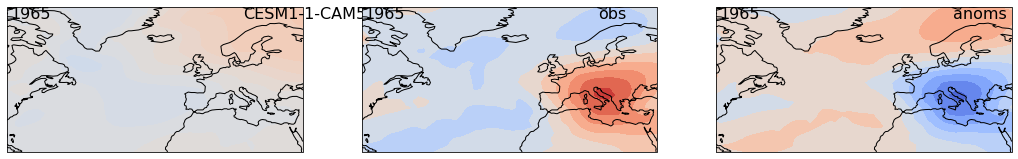

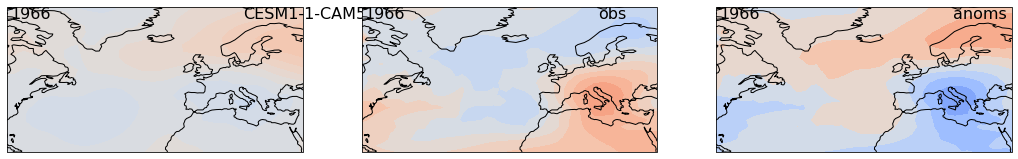

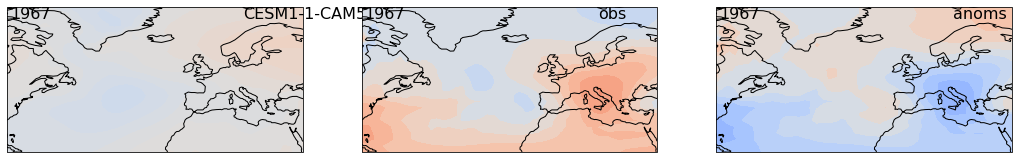

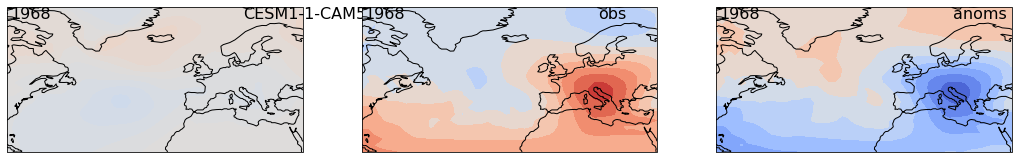

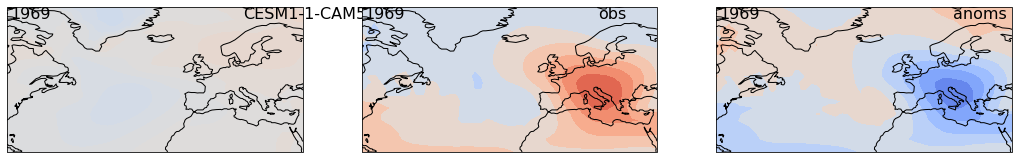

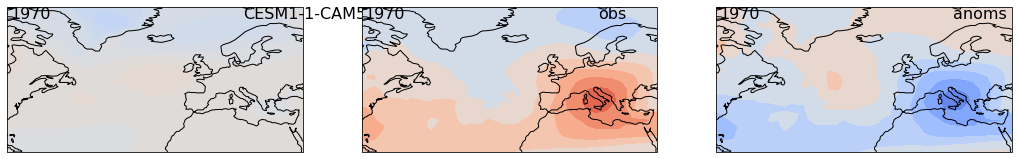

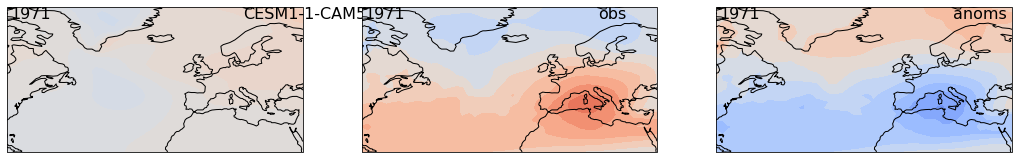

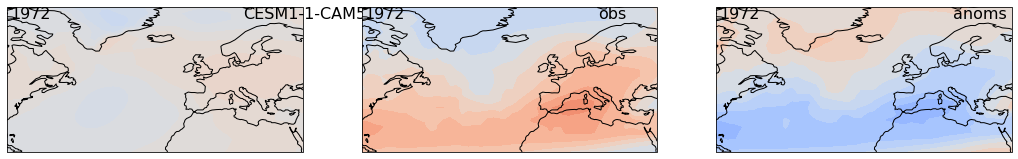

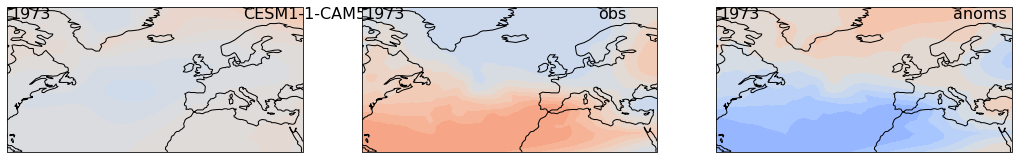

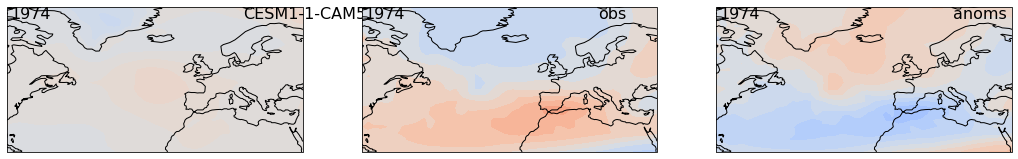

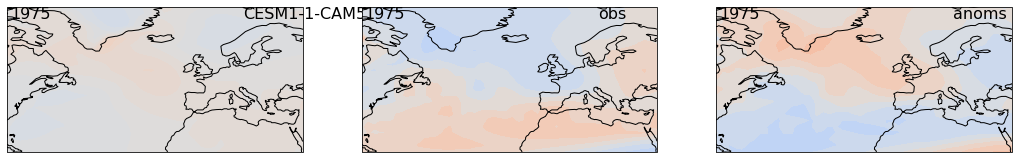

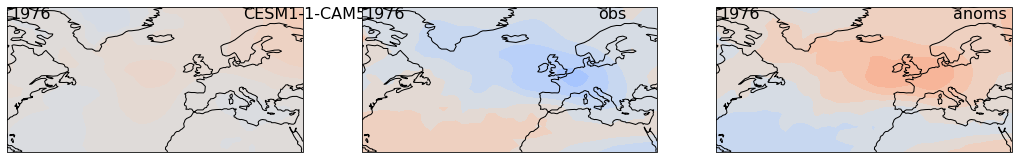

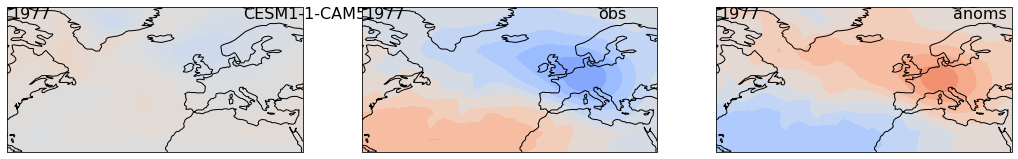

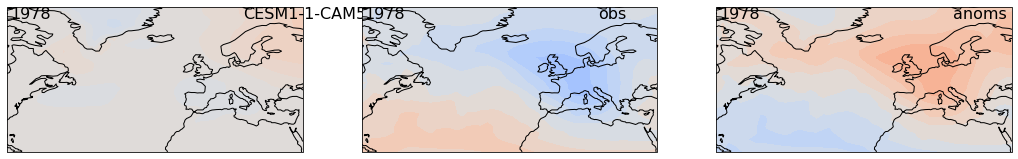

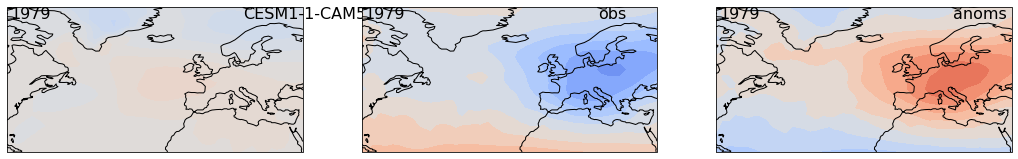

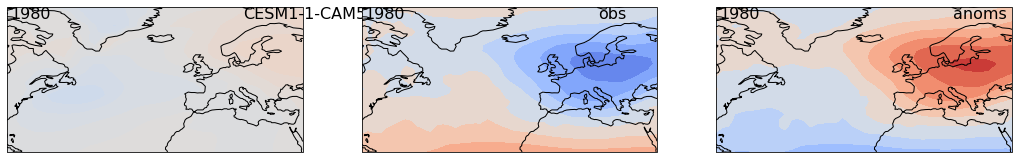

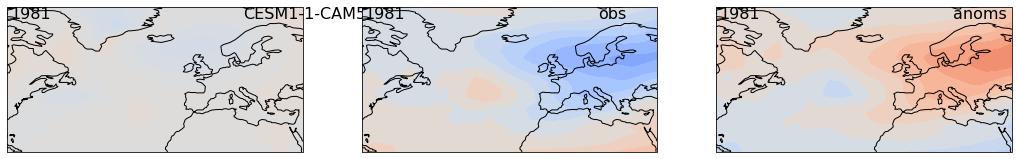

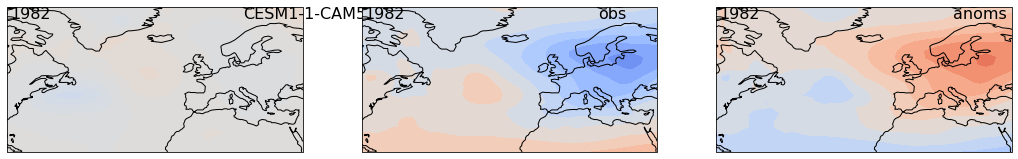

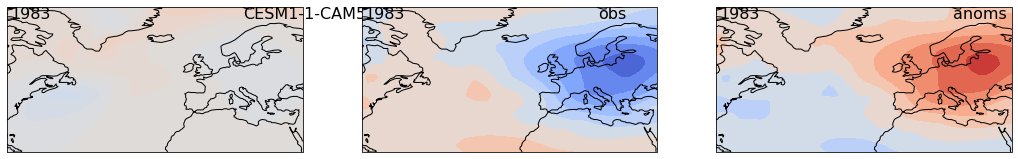

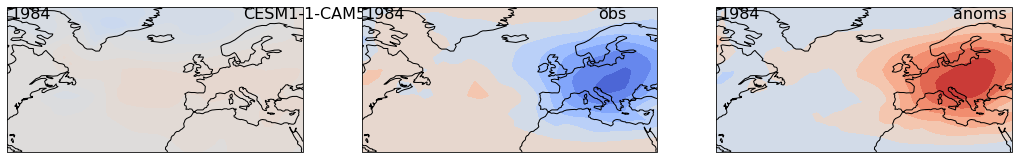

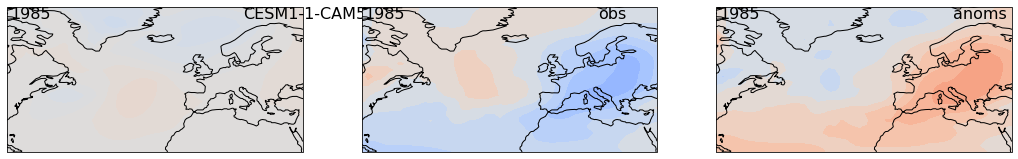

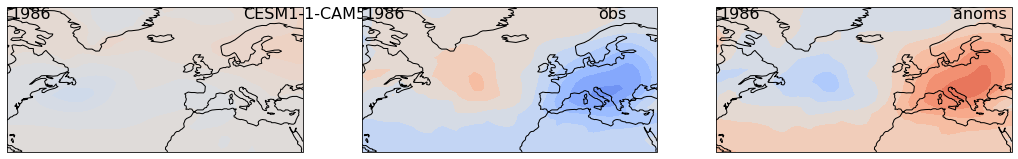

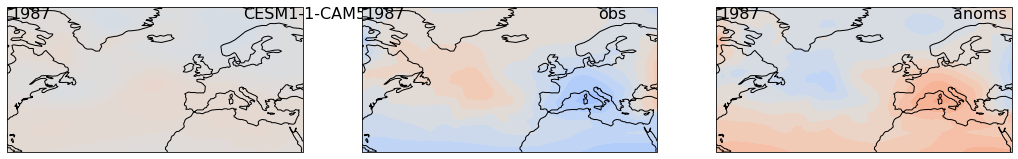

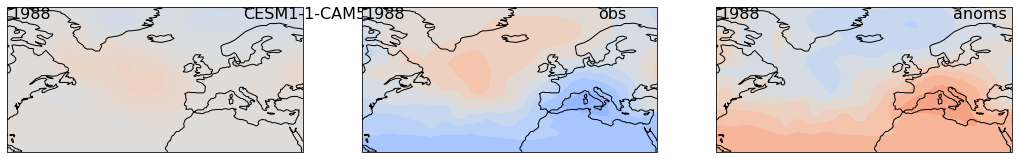

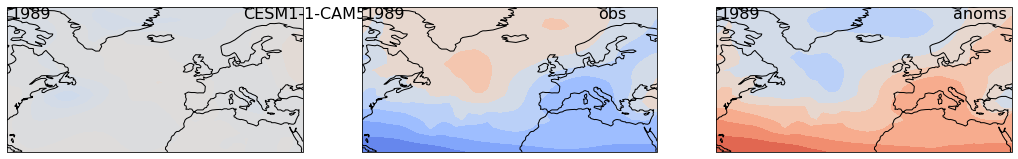

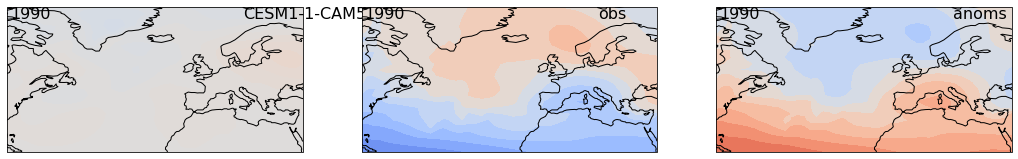

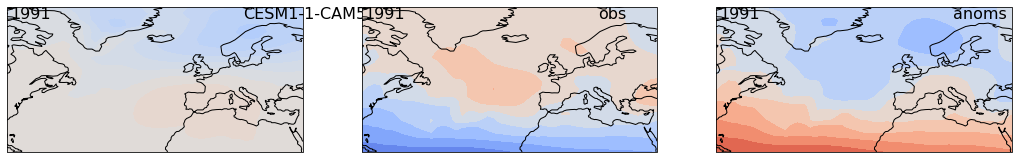

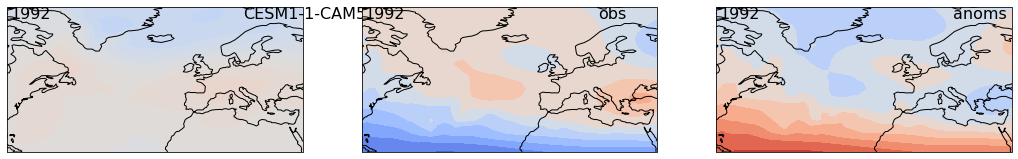

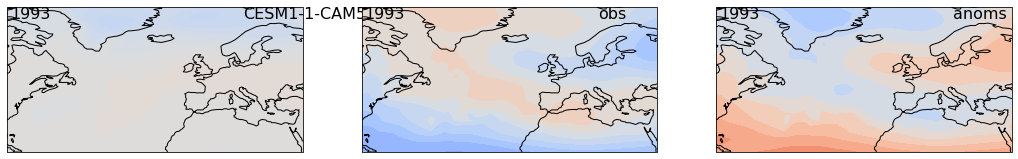

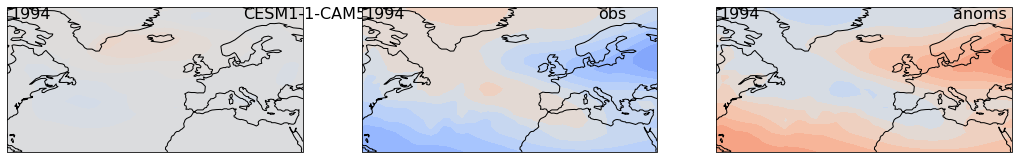

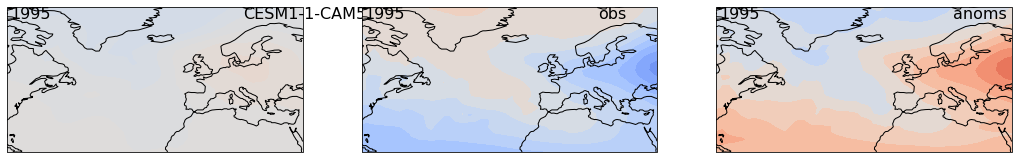

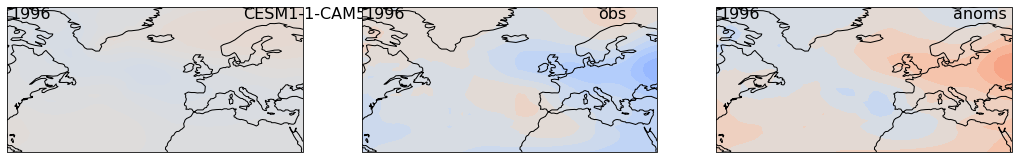

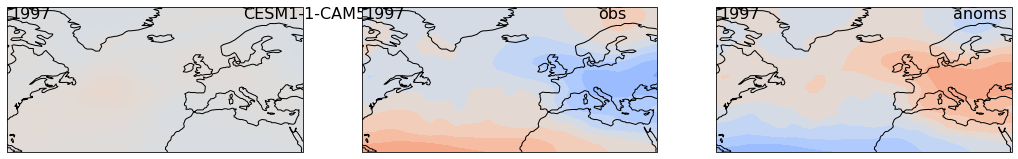

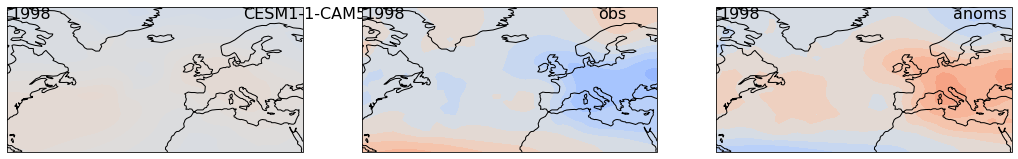

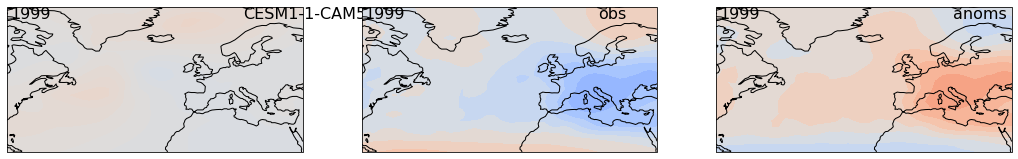

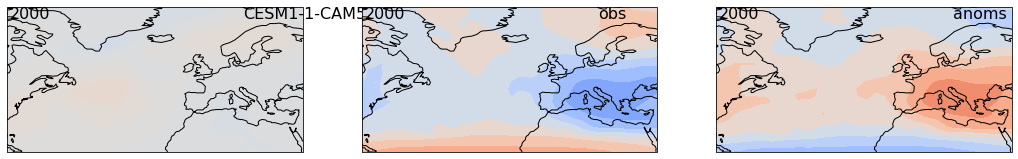

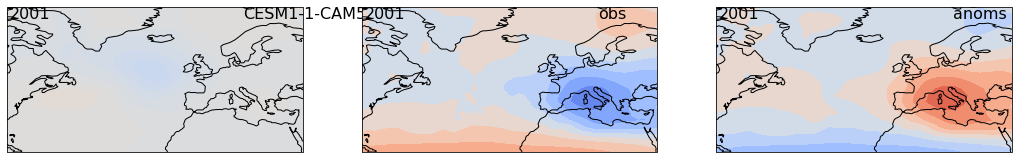

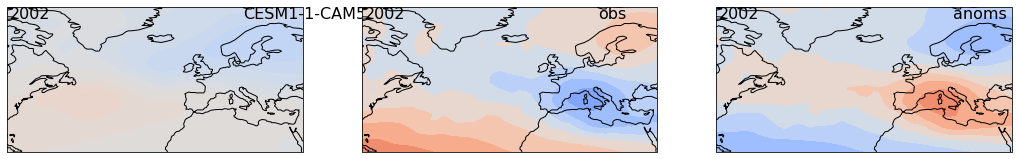

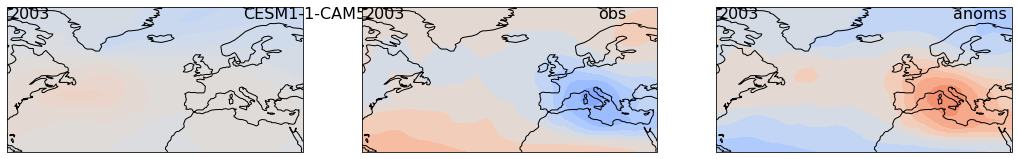

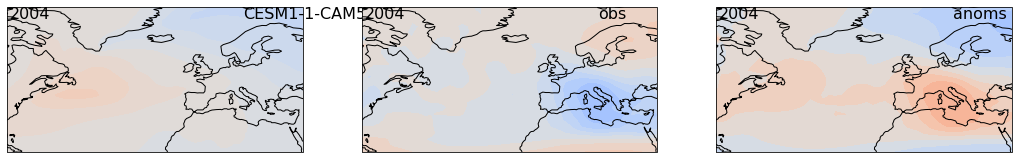

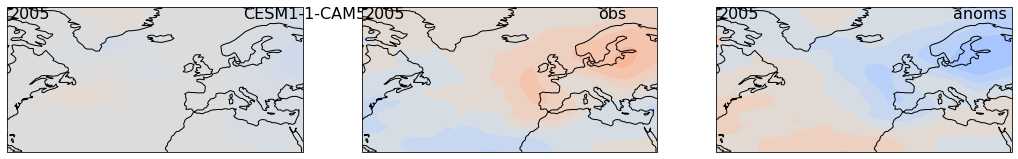

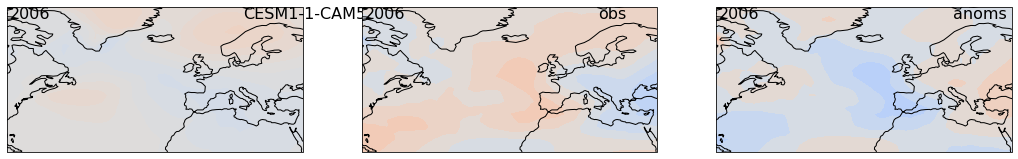

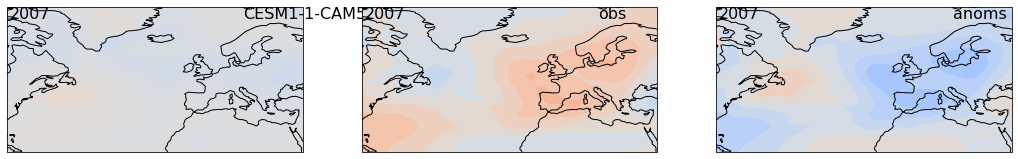

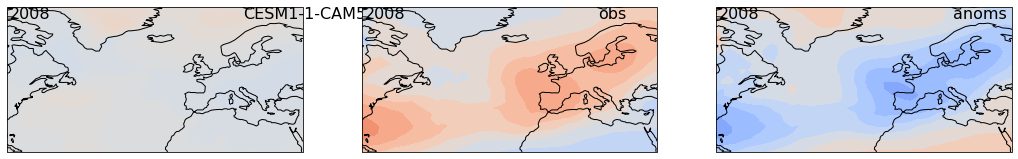

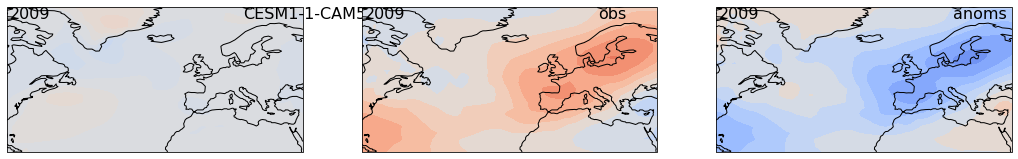

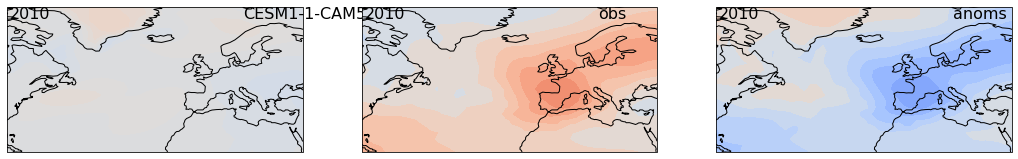

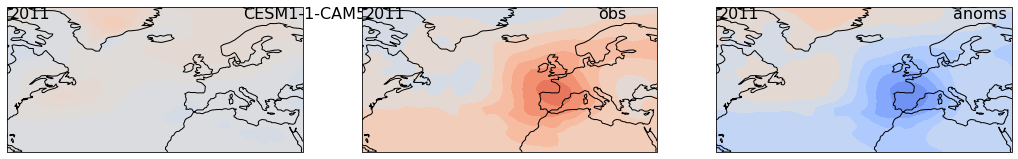

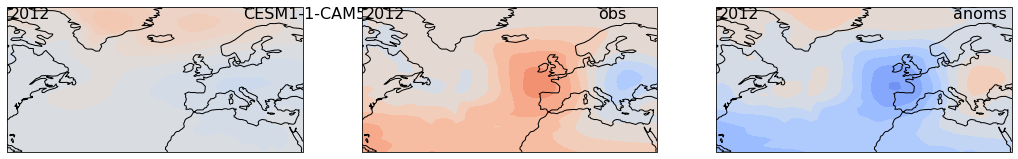

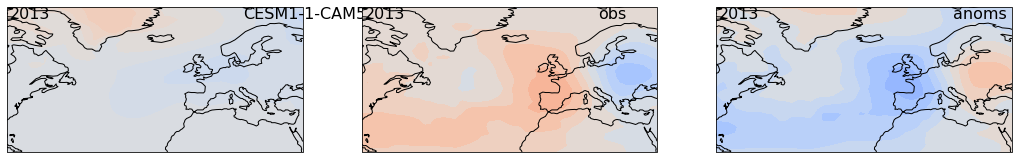

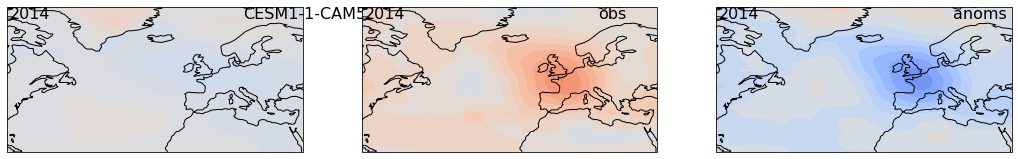

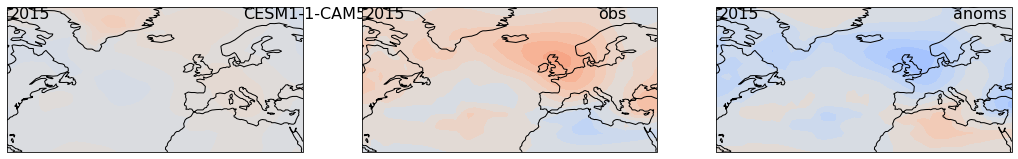

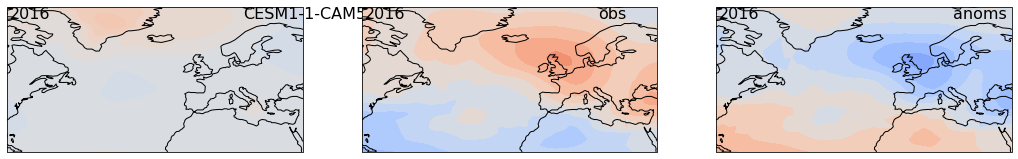

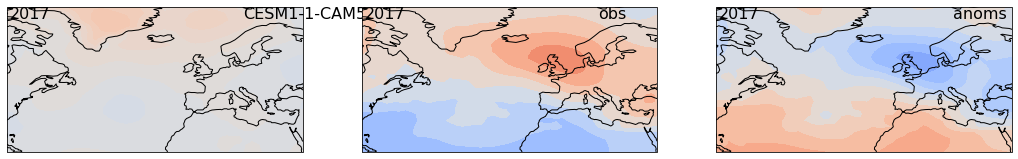

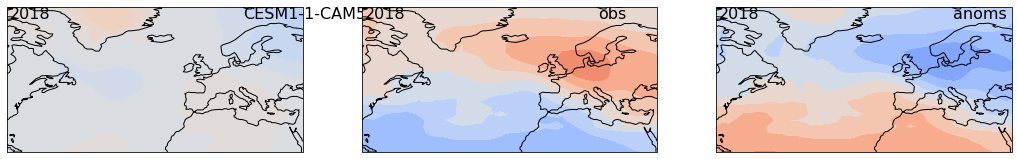

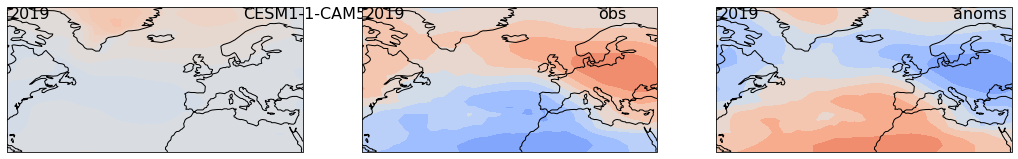

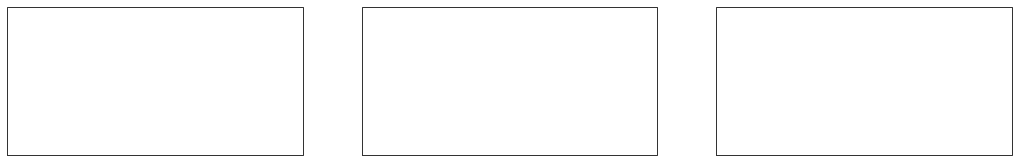

In [17]:
fnc.plot_model_data(variable_data, obs, dic.test_model_cesm, dic.gif_plots_dir)

In [ ]:
# print((np.shape(variable_data['NorCPM1'])))

In [ ]:
obs

In [ ]:
print(type(dic.test_model_norcpm))

In [18]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.test_model_cesm)

extracting data for model: CESM1-1-CAM5-CMIP5
trying to print values for each member for debugging
values for model: CESM1-1-CAM5-CMIP5
values for members: <xarray.DataArray 'psl' (time: 58, lat: 24, lon: 48)>
dask.array<open_dataset-cfe951d2ea421739b74f10fd13c9ed82psl, shape=(58, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1965-07-31 00:00:00 ... 2022-07-31 00:00:00
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    comment:        PSL
    description:    not, in general, the same as surface pressure
    frequency:      mon
    id:             psl
    mipTable:       Amon
    out_name:       psl
    prov:     

[[-0.11065267 -0.13073828 -0.15069821 ... -0.04216405 -0.04618652
  -0.01639587]
 [-0.11513505 -0.12875789 -0.13773785 ...  0.02328459  0.01014839
   0.07706227]
 [-0.12944609 -0.13853973 -0.14971768 ...  0.20550693  0.18866142
   0.2418159 ]
 ...
 [ 0.07282247  0.19505959  0.17123596 ... -0.31672415 -0.34372827
  -0.3465311 ]
 [ 0.19596947  0.04650046 -0.02752382 ... -0.36440341 -0.35867548
  -0.34271422]
 [ 0.30957975  0.29706239  0.12068469 ... -0.24949355 -0.23931728
  -0.22898322]]


(array([[ 2.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  7.,  1.,  0.,  1.,  1.,
          0.,  1.,  0.,  1.,  0.,  0.,  1.],
        [ 0.,  0.,  2.,  1.,  4.,  2.,  1.,  1.,  8.,  2.,  0.,  1.,  0.,
          0.,  1.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  0.,  4.,  5.,  0.,  1.,  7.,  1.,  1.,  0.,  1.,
          2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  3.,  5.,  2.,  2.,  4.,  3.,  2.,  0.,  1.,
          1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  1.,  2.,  3.,  3.,  6.,  3.,  3.,  0.,  0.,
          1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  3.,  5.,  1.,  0.,
          0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  5.,  8.,  4.,  2.,  0.,
          1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  5.,  2.,  3.,  8.,  1.,  4.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  4.,  2.,

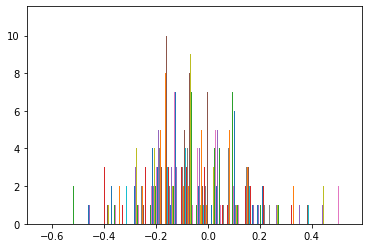

In [19]:
# print the rfield
print(rfield)
# visualise the distribution of r values
# as a histogram
plt.hist(rfield, bins=20)

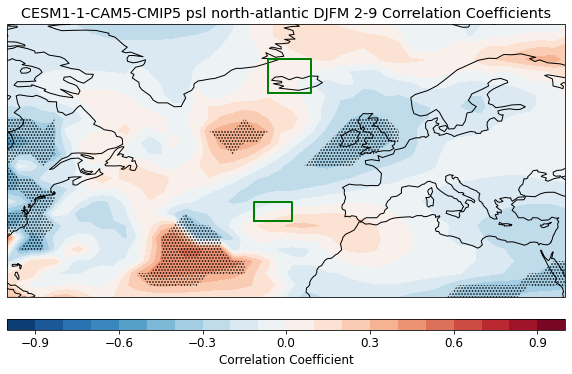

In [20]:
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.test_model_cesm, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid)

Processing model: BCC-CSM2-MR


KeyError: 'BCC-CSM2-MR'

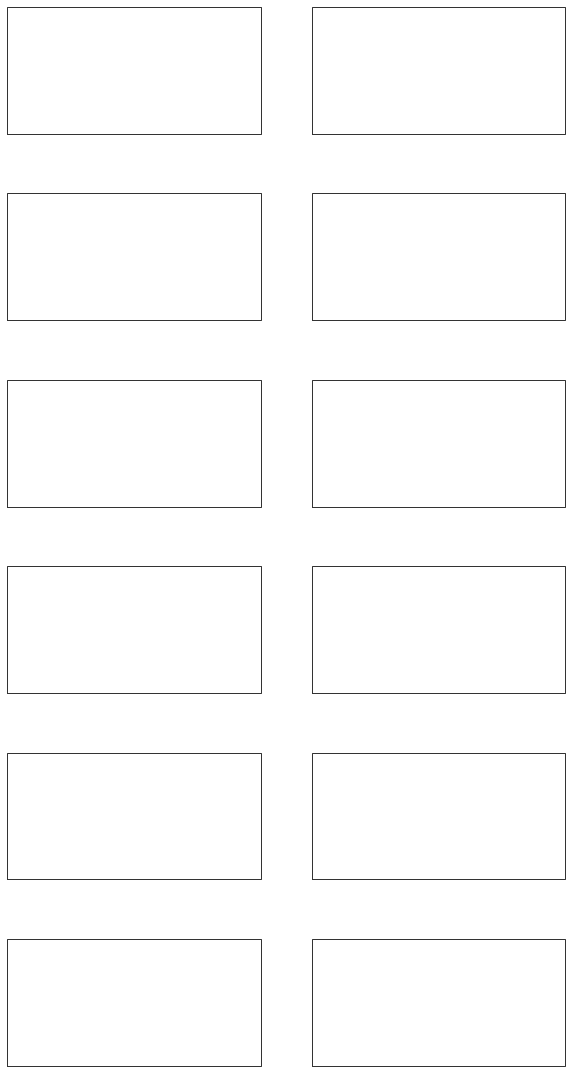

In [19]:
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid)